In [27]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
def plot_confusion_matrix(conf_matrix, class_names, path):
    plt.figure(figsize=(5, 5))
    sns.heatmap(
        conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5,
        square=True, xticklabels=class_names, yticklabels=class_names
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(path)


In [18]:
def elimina_alfa(lista):
  # print(lista)
  lista_valori = lista.split(",")
  values = []
  for val in lista_valori:
    temp = ""
    for v in val:
      if v.isdigit():
        temp = temp+v
    values.append(int(temp))
  return sum(values)

In [28]:
df = pd.read_csv("Event_traces.csv", sep=",")

In [ ]:
df.head()

In [56]:
df_features = df[["Features", "Latency"]]

In [57]:
# df_features[["TimeInterval"]] = df_features[["TimeInterval"]].applymap(lambda x: sum(ast.literal_eval(x)))
df_features[['Features']] = df_features[['Features']].applymap(lambda x: elimina_alfa(x))

<ipython-input-57-2e2bd3a45f70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[['Features']] = df_features[['Features']].applymap(lambda x: elimina_alfa(x))


In [59]:
labels_string = df[["Label"]]

In [60]:
labels = labels_string.applymap(lambda x: 1 if x == "Success" else -1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_features, labels, test_size=0.2, random_state=42)

In [19]:
# X_train[['Features']] = X_train[['Features']].applymap(lambda x: elimina_alfa(x))

In [20]:
# X_train[["TimeInterval"]] = X_train[["TimeInterval"]].applymap(lambda x: sum(ast.literal_eval(x)))

In [21]:
# X_test[["TimeInterval"]] = X_test[["TimeInterval"]].applymap(lambda x: sum(ast.literal_eval(x)))
# X_test[['Features']] = X_test[['Features']].applymap(lambda x: elimina_alfa(x))

In [62]:
df_features

,Features,Latency
0,1719,3802
1,314,3802
2,936,3797
3,313,50448
4,376,50583
...,...,...
575056,307,128
575057,307,120
575058,307,111
575059,307,106


In [63]:
model_if = IsolationForest(contamination=0.1)
model_if.fit(X_train)
joblib.dump(model_if, "IF.save")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


['IF.save']

In [64]:
anomalie_test_if = model_if.predict(X_test)

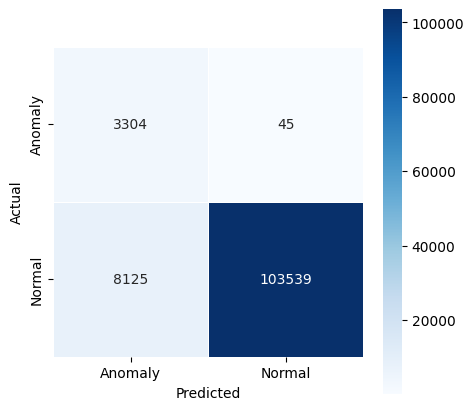

In [66]:
matrice_confusione = confusion_matrix(y_test, anomalie_test_if)
plot_confusion_matrix(matrice_confusione, class_names=["Anomaly","Normal"], path="if_matrix.png")

In [69]:
# Visualizza la matrice di confusione
print("Matrice di Confusione:")
print(matrice_confusione)

# Calcola e visualizza le metriche di classificazione
print("\nReport di Classificazione:")
print(classification_report(y_test, anomalie_test_if))

Matrice di Confusione:
[[  3304     45]
 [  8125 103539]]

Report di Classificazione:
              precision    recall  f1-score   support

          -1       0.29      0.99      0.45      3349
           1       1.00      0.93      0.96    111664

    accuracy                           0.93    115013
   macro avg       0.64      0.96      0.70    115013
weighted avg       0.98      0.93      0.95    115013

